# Data analysis of Auction Model

In [134]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Global variable (which was used in the batch runs)
AUCTION_LENGTH = 100

In [76]:
# 10,000 epochs of simulations
legacy_df = pd.read_csv("results_legacy_bidincrease_sniper_no_watchproba.csv", index_col=0)

## Getting final row of each epoch

In [77]:
splits = np.where(legacy_df["Highest Bid"] == 0)[0]
splits = np.delete(splits, 0)
splits = np.append(splits, len(legacy_df["Highest Bid"]-1))
final_rows = splits - 1
print(final_rows)

[    100     201     302 ... 1009797 1009898 1009999]


In [78]:
final_prices_df = legacy_df.iloc[final_rows]
# Removing any rows which contain 0 or None
# These are edge cases where the model does not receive any bids in the first few timesteps
final_prices_df.drop(final_prices_df.index[np.where(final_prices_df["Highest Bid"] == 0)[0]], axis=0, inplace=True)

C:\Users\Will\AppData\Local\Temp\ipykernel_3384\3337094288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_prices_df.drop(final_prices_df.index[np.where(final_prices_df["Highest Bid"] == 0)[0]], axis=0, inplace=True)


## Calculating win ratio of EarlyBidder : SniperBidder

In [79]:
earlyBidderWinPercent = 100 * (len(np.where(final_prices_df["Highest Bidder"] == "EarlyBidder")[0]) / len(final_prices_df["Highest Bidder"]))
sniperBidderWinPercent = 100 - earlyBidderWinPercent

In [84]:
print(f'EarlyBidder win percentage: {earlyBidderWinPercent:.2f}%')
print(f'SniperBidder win percentage: {sniperBidderWinPercent:.2f}%')

EarlyBidder win percentage: 86.82%
SniperBidder win percentage: 13.18%


## Finding sniper bidder wins

Plus calculating the percentage difference between the 1st and 2nd highest bids

In [85]:
sniper_bidder_wins = final_prices_df.iloc[np.where(final_prices_df["Highest Bidder"] == "SniperBidder")[0]]

In [92]:
sniper_bidder_premiums = (sniper_bidder_wins["Highest Bid"] - sniper_bidder_wins["Second Highest Bid"]) / sniper_bidder_wins["Second Highest Bid"]
print(sniper_bidder_premiums)

302        0.122299
1615       0.000000
2423       0.078748
5150       0.048391
5958       0.007183
             ...   
1004141    0.007931
1004646    0.012969
1004848    0.000000
1007070    0.000000
1009494    0.022952
Length: 1318, dtype: float64


In [102]:
mean_sniper_premium = np.mean(sniper_bidder_premiums)
print(f'Mean early bidder premium: {mean_sniper_premium}')
median_sniper_premium = np.median(sniper_bidder_premiums)
print(f'Median early bidder premium: {median_sniper_premium}')

Mean early bidder premium: 0.03485080106947434
Median early bidder premium: 0.013082746607132992


## Finding early bidder wins

Plus calculating the percentage difference between the 1st and 2nd highest bids

In [94]:
early_bidder_wins = final_prices_df.iloc[np.where(final_prices_df["Highest Bidder"] == "EarlyBidder")[0]]

In [95]:
early_bidder_premiums = (early_bidder_wins["Highest Bid"] - early_bidder_wins["Second Highest Bid"]) / early_bidder_wins["Second Highest Bid"]
print(early_bidder_premiums)

100        0.028878
201        0.008591
403        0.112308
504        0.013226
605        0.079081
             ...   
1009595    0.047983
1009696    0.050227
1009797    0.051911
1009898    0.071318
1009999    0.000811
Length: 8682, dtype: float64


In [101]:
mean_early_bidder_premium = np.mean(early_bidder_premiums)
print(f'Mean early bidder premium: {mean_early_bidder_premium}')
median_early_bidder_premium = np.median(early_bidder_premiums)
print(f'Median early bidder premium: {median_early_bidder_premium}')

Mean early bidder premium: 0.29176795810543776
Median early bidder premium: 0.04391166614794628


We can see that the early bidders paid a large premium (29%) for their win on average (mean), however the median value is much lower at 4%, showing that there was some serious outliers in the dataset

In [103]:
print(early_bidder_wins.iloc[np.argmax(early_bidder_premiums)])

Highest Bid               995.729528
Highest Bidder           EarlyBidder
Second Highest Bid          3.827394
Second Highest Bidder    EarlyBidder
Name: 233309, dtype: object


## Finding mean auction bid (highest and second highest) at each timestep

In [133]:
mean_bids = legacy_df.groupby(np.arange(len(legacy_df))%(AUCTION_LENGTH+1)).mean()

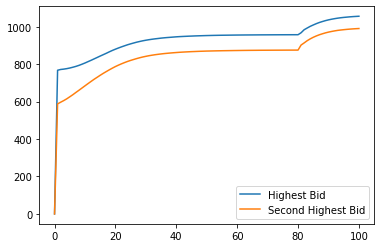

In [138]:
mean_bids.plot()
plt.show()